<a href="https://colab.research.google.com/github/julioclerio/brazil_conflict_analysis/blob/main/estatistica_trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
path = ' '
pd.set_option('display.max_columns', None)
df = pd.read_csv(path, sep=',', encoding='utf-8')

In [ ]:
df.head(5)

,EVENT_DATE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ACTOR2,COUNTRY,LOCATION,LATITUDE,LONGITUDE,SOURCE_SCALE,NOTES,FATALITIES
0,01-January-2018,Protests,Peaceful protest,Protesters (Brazil),NaN,Brazil,Teresina,-5.089,-42.802,National,"At the beginning of January 2018, in Teresina,...",0
1,01-January-2018,Protests,Peaceful protest,Protesters (Brazil),NaN,Brazil,Cuiaba,-15.596,-56.097,National,"On 1 January 2018, local residents protested i...",0
2,01-January-2018,Violence against civilians,Attack,Unidentified Armed Group (Brazil),Civilians (Brazil),Brazil,Santa Cruz do Capibaribe,-7.948,-36.206,National,"On 1 January 2018, in Santa Cruz do Capibaribe...",2
3,01-January-2018,Violence against civilians,Attack,Unidentified Gang and/or Police Militia,Civilians (Brazil),Brazil,Petrolina,-9.389,-40.503,National,"On 1 January 2018, Petrolina, Pernambuco, a ma...",1
4,01-January-2018,Violence against civilians,Attack,Unidentified Armed Group (Brazil),Civilians (Brazil),Brazil,Floriano,-6.773,-43.012,National,"On 1 January 2018, in Floriano, Piaui, a man w...",1


LIMPEZA DOS DADOS


In [ ]:
df.isna().sum()

EVENT_DATE            0
EVENT_TYPE            0
SUB_EVENT_TYPE        0
ACTOR1                0
ACTOR2            22345
COUNTRY               0
LOCATION              0
LATITUDE              0
LONGITUDE             0
SOURCE_SCALE          0
NOTES                 0
FATALITIES            0
dtype: int64

In [ ]:
df.count()

EVENT_DATE        62861
EVENT_TYPE        62861
SUB_EVENT_TYPE    62861
ACTOR1            62861
ACTOR2            40516
COUNTRY           62861
LOCATION          62861
LATITUDE          62861
LONGITUDE         62861
SOURCE_SCALE      62861
NOTES             62861
FATALITIES        62861
dtype: int64

In [ ]:
# COLUNA ACTOR 2 (ENVOLVIDOS SECUNDÁRIOS) POSSUÍ 35,54% DE DADOS NULOS
actor2 = (22345*100)/62861
actor2

35.5466823626732

In [ ]:
# TRATAMENTO DE TIPAGEM
df.dtypes

EVENT_DATE         object
EVENT_TYPE         object
SUB_EVENT_TYPE     object
ACTOR1             object
ACTOR2             object
COUNTRY            object
LOCATION           object
LATITUDE          float64
LONGITUDE         float64
SOURCE_SCALE       object
NOTES              object
FATALITIES          int64
dtype: object

In [ ]:
# TRADUÇÃO PARA PORTUGUÊS DATAFRAME UTILIZANDO RENAME
df.rename(columns={'EVENT_DATE':'data_evento'}, inplace=True)
df['data_evento'] = pd.to_datetime(df['data_evento'])

In [ ]:
# TRADUÇÃO PARA PORTUGUÊS DATAFRAME UTILIZANDO RENAME
df.rename(columns={'EVENT_TYPE':'tipo_ocorrencia', 'SUB_EVENT_TYPE': 'subtipo_ocorrencia','ACTOR1':'princ_envolvidos','ACTOR2':'envolvidos_sec', 'LOCATION':'cidade', 'NOTES':'resumo','FATALITIES':'fatalidades', 'SOURCE_SCALE':'alcance'}, inplace=True)

In [ ]:
# TROCANDO TIPAGEM DOS DADOS
converter_string = ['tipo_ocorrencia', 'subtipo_ocorrencia', 'princ_envolvidos', 'envolvidos_sec', 'cidade', 'resumo']

for i in converter_string:
  df[i] = df[i].astype('string')

In [ ]:
# DADOS SOMENTE NACIONAIS
df['COUNTRY'].unique()
# DROP NA COLUNA PAÍS
df = df.drop('COUNTRY', axis=1)

In [ ]:
df['SOURCE_SCALE'].unique()

array(['National', 'National-International', 'Other', 'New media',
       'Subnational', 'New media-National', 'Local partner-Other',
       'Subnational-National', 'International', 'New media-Subnational',
       'Other-New media', 'Regional', 'Subnational-International',
       'New media-International', 'Other-National', 'Other-Subnational',
       'Local partner-New media'], dtype=object)

In [ ]:
df['tipo_ocorrencia'].unique()

<StringArray>
[                  'Protests', 'Violence against civilians',
                    'Battles',                      'Riots',
 'Explosions/Remote violence',     'Strategic developments']
Length: 6, dtype: string

In [ ]:
# TRADUÇÃO DE INFORMAÇÕES COLUNA TIPO DE OCORRENCIA
df['tipo_ocorrencia'].replace({
    'Protests': 'Protestos',
    'Violence against civilians': 'Violência contra civis',
    'Battles': 'Batalhas',
    'Riots': 'Distúrbios',
    'Explosions/Remote violence': 'Explosões/Violência remota',
    'Strategic developments': 'Desenvolvimentos estratégicos'
}, inplace=True)

In [ ]:
df['subtipo_ocorrencia'].unique()

<StringArray>
[                  'Peaceful protest',                             'Attack',
                        'Armed clash',                       'Mob violence',
      'Remote explosive/landmine/IED',              'Violent demonstration',
       'Looting/property destruction',              'Disrupted weapons use',
          'Protest with intervention',                            'Arrests',
     'Abduction/forced disappearance',  'Non-violent transfer of territory',
                    'Sexual violence',           'Change to group/activity',
                              'Other', 'Excessive force against protesters',
                            'Grenade',                    'Chemical weapon',
   'Headquarters or base established']
Length: 19, dtype: string

In [ ]:
# TRADUÇÃO DE INFORMAÇÕES COLUNA SUBTIPO DE OCORRÊNCIA
df['subtipo_ocorrencia'].replace({
    'Peaceful protest': 'Protesto pacífico',
    'Attack': 'Ataque',
    'Armed clash': 'Confronto armado',
    'Mob violence': 'Violência de multidão',
    'Remote explosive/landmine/IED': 'Explosivo remoto/mina terrestre/IED',
    'Violent demonstration': 'Demonstração violenta',
    'Looting/property destruction': 'Saque/destruição de propriedade',
    'Disrupted weapons use': 'Uso interrompido de armas',
    'Protest with intervention': 'Protesto com intervenção',
    'Arrests': 'Prisões',
    'Abduction/forced disappearance': 'Sequestro/desaparecimento forçado',
    'Non-violent transfer of territory': 'Transferência não violenta de território',
    'Sexual violence': 'Violência sexual',
    'Change to group/activity': 'Mudança para grupo/atividade',
    'Other': 'Outro',
    'Excessive force against protesters': 'Uso excessivo de força contra manifestantes',
    'Grenade': 'Granada',
    'Chemical weapon': 'Arma química',
    'Headquarters or base established': 'Sede ou base estabelecida'
}, inplace=True)

In [ ]:
valores_unicos = df['princ_envolvidos'].unique()
for valor in valores_unicos:
    print(valor)

Protesters (Brazil)
Unidentified Armed Group (Brazil)
Unidentified Gang and/or Police Militia
CV: Red Command
Unidentified Gang (Brazil)
Rioters (Brazil)
Military Forces of Brazil (2016-2018) Military Police
PCC: First Capital Command
Military Forces of Brazil (2016-2018) UPP: Pacifying Police Unit
Police Forces of Brazil (2016-2018) Civil Police
Police Forces of Brazil (2016-2018)
Military Forces of Brazil (2016-2018)
Police Forces of Brazil (2016-2018) Municipal Guards
Police Forces of Brazil (2016-2018) Federal Police
FDN: Family of the North
PR: Republic Party
GDE: Guardians of the State
Carecas do Brasil
Brazil Skinheads
ADA: Amigos dos Amigos
TCP: Pure Third Command
Private Security Forces (Brazil)
Police Forces of Brazil (2016-2018) Prison Guards
Bala na Cara Gang
RN: Crime Union of RN
Unidentified Armed Group (Colombia)
Poorf Gang
Government of Brazil (2016-2018)
Buchudo's Gang
Vala Gang
Bakairi Indigenous Militia (Brazil)
Police Forces of Brazil (2016-2018) GAECO: Special Acti

In [ ]:
# TRADUÇÃO DE INFORMAÇÕES DA COLUNA PRINCIPAIS ENVOLVIDOS
df['princ_envolvidos'].replace({
    'Protesters (Brazil)': 'Manifestantes (Brasil)',
    'Unidentified Armed Group (Brazil)': 'Grupo Armado Não Identificado (Brasil)',
    'Unidentified Gang and/or Police Militia': 'Gangue Não Identificada e/ou Milícia Policial',
    'CV: Red Command': 'CV: Comando Vermelho',
    'Unidentified Gang (Brazil)': 'Gangue Não Identificada (Brasil)',
    'Rioters (Brazil)': 'Tumultuadores (Brasil)',
    'Military Forces of Brazil (2016-2018) Military Police': 'Forças Militares do Brasil (2016-2018) Polícia Militar',
    'PCC: First Capital Command': 'PCC: Primeiro Comando da Capital',
    'Military Forces of Brazil (2016-2018) UPP: Pacifying Police Unit': 'Forças Militares do Brasil (2016-2018) UPP: Unidade de Polícia Pacificadora',
    'Police Forces of Brazil (2016-2018) Civil Police': 'Forças Policiais do Brasil (2016-2018) Polícia Civil',
    'PTB: Brazilian Labour Party': 'PTB: Partido Trabalhista Brasileiro',
    'Police Forces of Brazil (2023-) Prison Guards': 'Forças Policiais do Brasil (2023-) Guardas Prisionais',
    'Tico e Teco Police Militia': 'Milícia Policial Tico e Teco',
    'Military Forces of Brazil (2023-) Military Police': 'Forças Militares do Brasil (2023-) Polícia Militar',
    'Police Forces of Brazil (2023-) Federal Police': 'Forças Policiais do Brasil (2023-) Polícia Federal',
    'Police Forces of Brazil (2023-) Civil Police': 'Forças Policiais do Brasil (2023-) Polícia Civil',
    'Military Forces of Brazil (2023-)': 'Forças Militares do Brasil (2023-)',
    'Police Forces of Brazil (2023-) GAECO: Special Action Group for the Prevention of Organized Crime': 'Forças Policiais do Brasil (2023-) GAECO: Grupo de Ação Especial de Combate ao Crime Organizado',
    'Catiri Police Militia': 'Milícia Policial Catiri',
    'Police Forces of Brazil (2016-2018)': 'Forças Policiais do Brasil (2016-2018)',
    'Military Forces of Brazil (2016-2018)': 'Forças Militares do Brasil (2016-2018)',
    'Police Forces of Brazil (2016-2018) Municipal Guards': 'Forças Policiais do Brasil (2016-2018) Guardas Municipais',
    'Police Forces of Brazil (2016-2018) Federal Police': 'Forças Policiais do Brasil (2016-2018) Polícia Federal',
    'FDN: Family of the North': 'FDN: Família do Norte',
    'PR: Republic Party': 'PR: Partido da República',
    'GDE: Guardians of the State': 'GDE: Guardiões do Estado',
    'Brazil Skinheads': 'Skinheads do Brasil',
    'ADA: Amigos dos Amigos': 'ADA: Amigos dos Amigos',
    'TCP: Pure Third Command': 'TCP: Terceiro Comando Puro',
    'Private Security Forces (Brazil)': 'Forças de Segurança Privada (Brasil)',
    'Police Forces of Brazil (2016-2018) Prison Guards': 'Forças Policiais do Brasil (2016-2018) Guardas Prisionais',
    'Bala na Cara Gang': 'Gangue Bala na Cara',
    'RN: Crime Union of RN': 'RN: União do Crime do RN',
    'Unidentified Armed Group (Colombia)': 'Grupo Armado Não Identificado (Colômbia)',
    'Poorf Gang': 'Gangue Poorf',
    'Government of Brazil (2016-2018)': 'Governo do Brasil (2016-2018)',
    'Buchudo\'s Gang': 'Gangue do Buchudo',
    'Vala Gang': 'Gangue da Vala',
    'Bakairi Indigenous Militia (Brazil)': 'Milícia Indígena Bakairi (Brasil)',
    'Police Forces of Brazil (2016-2018) GAECO: Special Action Group for the Prevention of Organized Crime': 'Forças Policiais do Brasil (2016-2018) GAECO: Grupo de Ação Especial de Combate ao Crime Organizado',
    'Protesters (Venezuela)': 'Manifestantes (Venezuela)',
    'Unidentified Communal Militia (Brazil)': 'Milícia Comunal Não Identificada (Brasil)'
}, inplace=True)


In [ ]:
valores_unicos = df['envolvidos_sec'].unique()
for valor in valores_unicos:
    print(valor)

<NA>
Civilians (Brazil)
Unidentified Armed Group (Brazil)
Unidentified Gang and/or Police Militia
TCP: Pure Third Command
CV: Red Command
Military Forces of Brazil (2016-2018) UPP: Pacifying Police Unit
Unidentified Gang (Brazil)
Military Forces of Brazil (2016-2018) Military Police
Police Forces of Brazil (2016-2018) Prison Guards
GDE: Guardians of the State
Police Forces of Brazil (2016-2018)
PGC: First Catarinense Group
Police Forces of Brazil (2016-2018) Civil Police
Police Forces of Brazil (2016-2018) Municipal Guards
Military Forces of Brazil (2016-2018)
PCC: First Capital Command
Police Forces of Brazil (2019-2022)
Unidentified Armed Group (Colombia)
Private Security Forces (Brazil)
Protesters (Brazil)
Anti-Bala Gang
Police Militia
Police Forces of Brazil (2016-2018) Federal Police
Civilians (Venezuela)
FDN: Family of the North
Rioters (Brazil)
Vala Gang
Legiao do Norte
Unidentified Armed Group (Peru)
Civilians (Bolivia)
B13: Tram of 13
ADA: Amigos dos Amigos
Unidentified Commun

In [ ]:
# TRADUÇÃO DE INFORMAÇÕES ENVOLVIDOS SECUNDÁRIOS
df['envolvidos_sec'].replace({
    'Civilians (Brazil)': 'Civis (Brasil)',
    'Unidentified Armed Group (Brazil)': 'Grupo Armado Não Identificado (Brasil)',
    'Unidentified Gang and/or Police Militia': 'Gangue e/ou Milícia Policial Não Identificada',
    'TCP: Pure Third Command': 'TCP: Terceiro Comando Puro',
    'CV: Red Command': 'CV: Comando Vermelho',
    'Military Forces of Brazil (2016-2018) UPP: Pacifying Police Unit': 'Forças Militares do Brasil (2016-2018) UPP: Unidade de Polícia Pacificadora',
    'Unidentified Gang (Brazil)': 'Gangue Não Identificada (Brasil)',
    'Military Forces of Brazil (2016-2018) Military Police': 'Forças Militares do Brasil (2016-2018) Polícia Militar',
    'Police Forces of Brazil (2016-2018) Prison Guards': 'Forças Policiais do Brasil (2016-2018) Guardas Prisionais',
    'GDE: Guardians of the State': 'GDE: Guardiões do Estado',
    'Police Forces of Brazil (2016-2018)': 'Forças Policiais do Brasil (2016-2018)',
    'PGC: First Catarinense Group': 'PGC: Primeiro Grupo Catarinense',
    'Police Forces of Brazil (2016-2018) Civil Police': 'Forças Policiais do Brasil (2016-2018) Polícia Civil',
    'Police Forces of Brazil (2016-2018) Municipal Guards': 'Forças Policiais do Brasil (2016-2018) Guardas Municipais',
    'Military Forces of Brazil (2016-2018)': 'Forças Militares do Brasil (2016-2018)',
    'PCC: First Capital Command': 'PCC: Primeiro Comando da Capital',
    'Police Forces of Brazil (2019-2022)': 'Forças Policiais do Brasil (2019-2022)',
    'Unidentified Armed Group (Colombia)': 'Grupo Armado Não Identificado (Colômbia)',
    'Private Security Forces (Brazil)': 'Forças de Segurança Privada (Brasil)',
    'Protesters (Brazil)': 'Manifestantes (Brasil)',
}, inplace=True)

In [ ]:
# TRADUÇÃO DE INFORMAÇÕES ENVOLVIDOS SECUNDÁRIOS
df['alcance'].replace({
    'National': 'Nacional',
    'National-International': 'Nacional-Internacional',
    'Other': 'Outro',
    'New media': 'Mídia Nova',
    'Subnational': 'Subnacional',
    'New media-National': 'Mídia Nova-Nacional',
    'Local partner-Other': 'Parceiro Local-Outro',
    'Subnational-National': 'Subnacional-Nacional',
    'International': 'Internacional',
    'New media-Subnational': 'Mídia Nova-Subnacional',
    'Other-New media': 'Outro-Mídia Nova',
    'Regional': 'Regional',
    'Subnational-International': 'Subnacional-Internacional',
    'New media-International': 'Mídia Nova-Internacional',
    'Other-National': 'Outro-Nacional',
    'Other-Subnational': 'Outro-Subnacional',
    'Local partner-New media': 'Parceiro Local-Mídia Nova'
},inplace=True)

ANÁLISE DOS DADOS

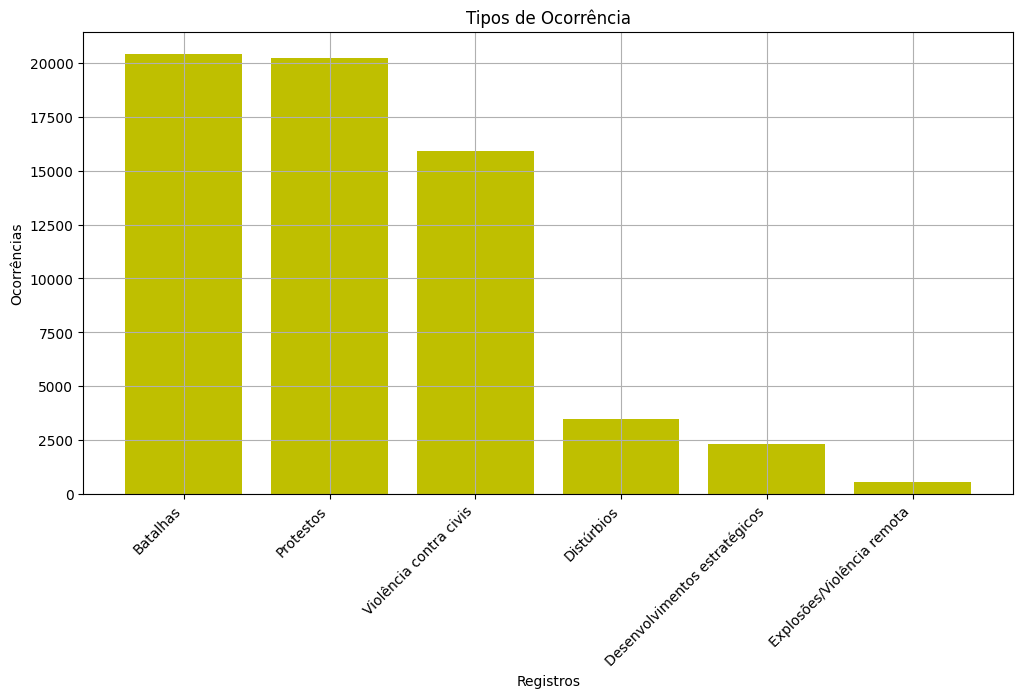

In [ ]:
# CONTAGEM DE OCORRÊNCIAS POR TIPOS
import matplotlib.pyplot as plt

contagem_tipo_ocorrencia = df['tipo_ocorrencia'].value_counts()

plt.figure(figsize=(12,6))
plt.bar(contagem_tipo_ocorrencia.index, contagem_tipo_ocorrencia, color='y')
plt.title("Tipos de Ocorrência")
plt.xlabel("Registros")
plt.ylabel("Ocorrências")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

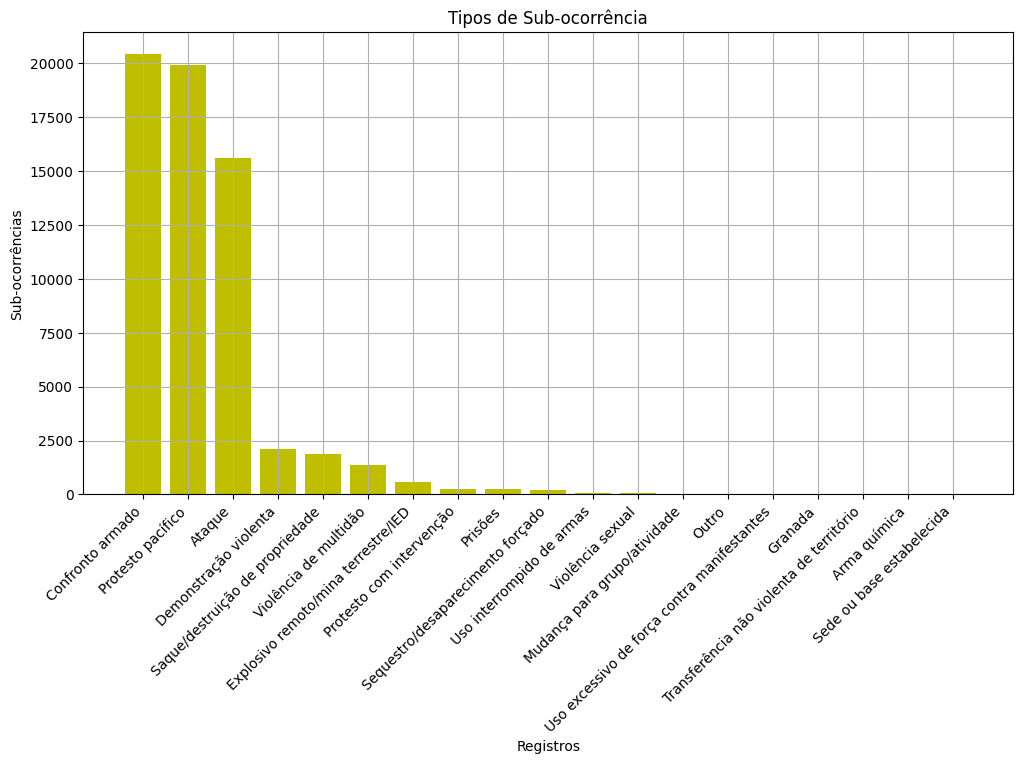

In [ ]:
# CONTAGEM DE OCORRÊNCIAS POR SUBTIPOS
contagem_subtipo_ocorrencia = df['subtipo_ocorrencia'].value_counts()

plt.figure(figsize=(12,6))
plt.bar(contagem_subtipo_ocorrencia.index, contagem_subtipo_ocorrencia, color='y')
plt.title("Tipos de Sub-ocorrência")
plt.xlabel("Registros")
plt.ylabel("Sub-ocorrências")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

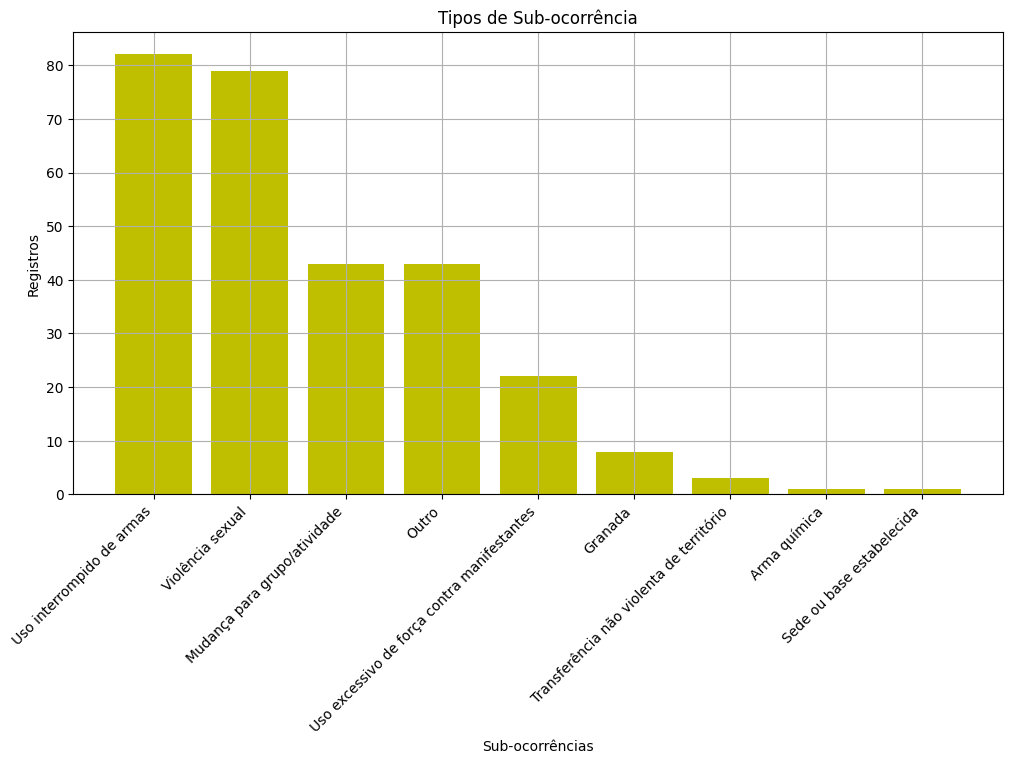

In [ ]:
# CONTAGEM DE OCORRÊNCIAS POR SUBTIPOS ( VALORES COM CONTAGEM BAIXA EM RELAÇÃO AO MAIOR )
lista_subtipos = ['Uso interrompido de armas', 'Violência sexual','Mudança para grupo/atividade', 'Outro','Uso excessivo de força contra manifestantes','Granada','Transferência não violenta de território','Arma química','Sede ou base estabelecida']

contagem_subtipo_ocorrencia_filtrada = contagem_subtipo_ocorrencia[contagem_subtipo_ocorrencia.index.isin(lista_subtipos)]

plt.figure(figsize=(12,6))
plt.bar(contagem_subtipo_ocorrencia_filtrada.index, contagem_subtipo_ocorrencia_filtrada, color='y')
plt.title("Tipos de Sub-ocorrência")
plt.xlabel("Sub-ocorrências")
plt.ylabel("Registros")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

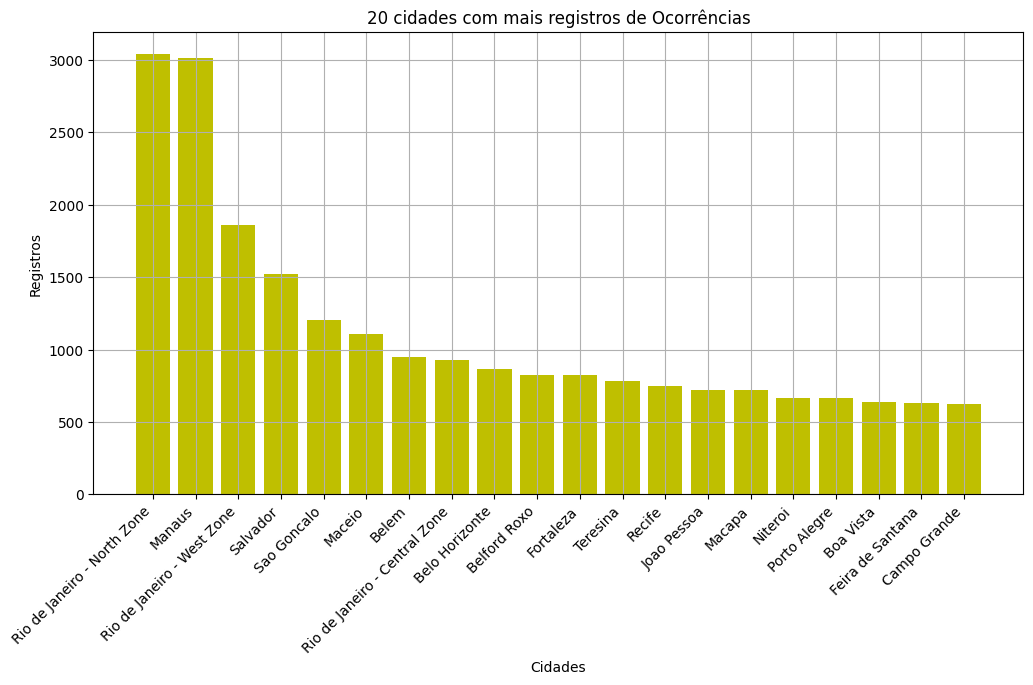

In [ ]:
# TOP VINTE CIDADES COM MAIS REGISTROS DE OCORRÊNCIAS

contagem_cidade = df['cidade'].value_counts()
sorted_cidades = contagem_cidade.head(20)

plt.figure(figsize=(12,6))
plt.bar(sorted_cidades.index, sorted_cidades, color='y')
plt.title("20 cidades com mais registros de Ocorrências")
plt.xlabel("Cidades")
plt.ylabel("Registros")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

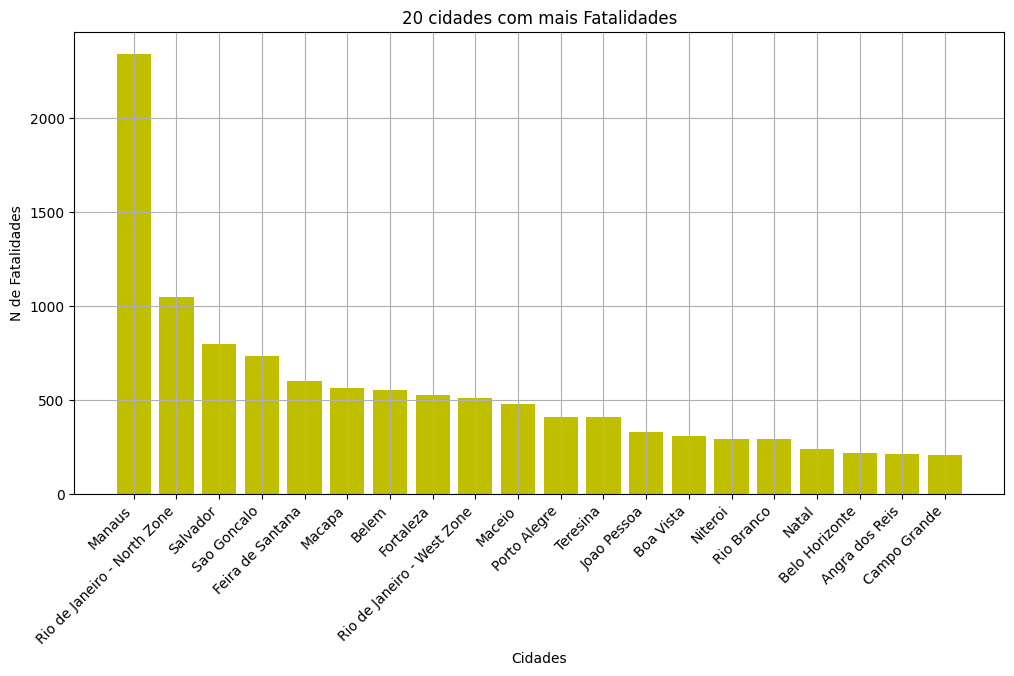

In [ ]:
# TOP VINTE CIDADES COM MAIS OCORRÊNCIAS DE FATALIDADES

fatalidades_cidade = df.groupby('cidade')['fatalidades'].sum()
sorted_cidade_fatalidade = fatalidades_cidade.sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
plt.bar(sorted_cidade_fatalidade.index, sorted_cidade_fatalidade, color='y')
plt.title("20 cidades com mais Fatalidades")
plt.xlabel("Cidades")
plt.ylabel("N de Fatalidades")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [ ]:
# ANALISE SOBRE CORRELAÇÃO ENTRE NUMERO DE HABITANTES DAS TOP 20 CIDADES COM MAIS OCORRÊNCIAS E A CONTAGEM DE OCORRÊNCIAS
dados = {
    'Cidades_ocorrencias': ["Rio de Janeiro - North Zone", "Manaus", "Rio de Janeiro - West Zone", "Salvador", "Sao Goncalo", "Maceio", "Belem", "Rio de Janeiro - Central Zone", "Belo Horizonte", "Belford Roxo", "Fortaleza", "Teresina", "Recife", "Joao Pessoa", "Macapa", "Niteroi", "Porto Alegre", "Boa Vista", "Feira de Santana", "Campo Grande"],
    # DADOS SOBRE HABITANTES FOI RETIRADO DO WIKIPEDIA
    'Habitantes': [2466666, 2063547, 2666666, 2418005, 896744, 957966, 1303389, 2366666, 2315560 , 483087, 2428678, 866300 , 1488920, 833932, 442933, 481758, 1332570, 413486, 616279, 897938],
    'Numero Ocorrencias': [3038, 3014, 1859, 1523, 1207, 1105, 948, 926, 863, 828, 822, 784, 750, 723, 721, 669, 665, 639, 630, 622]
}

df_habitantes_ocorrencias = pd.DataFrame(dados)
correlacao = df_habitantes_ocorrencias['Habitantes'].corr(df_habitantes_ocorrencias['Numero Ocorrencias'])

print(f"A correlação entre numero de habitantes e numero de ocorrencias é {correlacao:.2f}")

A correlação entre numero de habitantes e numero de ocorrencias é 0.58


In [ ]:
tabela_correlacao = {
    'Intervalo_r': ['0.00 - 0.19', '0.20 - 0.39', '0.40 - 0.59', '0.60 - 0.79', '0.80 - 1.00'],
    'Classificacao': ['Fraco', 'Medio', 'Bom', 'Forte', 'Otimo'],
    'Confianca': ['Baixa', 'Media', 'Media', 'Alta', 'Alta']
}
df_classificacao = pd.DataFrame(tabela_correlacao)
df_classificacao

,Intervalo_r,Classificacao,Confianca
0,0.00 - 0.19,Fraco,Baixa
1,0.20 - 0.39,Medio,Media
2,0.40 - 0.59,Bom,Media
3,0.60 - 0.79,Forte,Alta
4,0.80 - 1.00,Otimo,Alta


In [ ]:
from scipy.stats import pearsonr
corr_pearson, _ = pearsonr(df_habitantes_ocorrencias['Habitantes'], df_habitantes_ocorrencias['Numero Ocorrencias'])
print(f'Correlação de Pearson: {corr_pearson:.2f}')

Correlação de Pearson: 0.58


In [ ]:
dados = {
    'Cidades_fatalidades':  ["Manaus", "Rio de Janeiro - North Zone", "Salvador", "Sao Goncalo", "Feira de Santana", "Macapa", "Belem", "Fortaleza", "Rio de Janeiro - West Zone", "Maceio", "Porto Alegre", "Teresina", "Joao Pessoa", "Boa Vista", "Niteroi", "Rio Branco", "Natal", "Belo Horizonte", "Angra dos Reis", "Campo Grande"],
    'Habitantes': [2466666, 2063547, 2666666, 2418005, 896744, 957966, 1303389, 2366666, 2315560 , 483087, 2428678, 866300 , 1488920, 833932, 442933, 481758, 1332570, 413486, 616279, 897938],
    'Fatalidades': [2344, 1050, 799, 734, 599, 565, 555, 526, 513, 478, 408, 407, 329, 310, 292, 290, 237, 219, 213, 208]

}

df_cidades_fatalidades = pd.DataFrame(dados)
correlacao_fatalidades = df_cidades_fatalidades['Habitantes'].corr(df_cidades_fatalidades['Fatalidades'])
print(f"A correlação entre numero de habitantes e numero de fatalidades é {correlacao_fatalidades:.2f}")

A correlação entre numero de habitantes e numero de fatalidades é 0.55


In [ ]:
desvio_padrao = df['fatalidades'].std()
print(f" O desvio padrão das ocorrências de fatalidade é {desvio_padrao}")

 O desvio padrão das ocorrências de fatalidade é 0.8703201000629023


In [ ]:
max_index = df['fatalidades'].idxmax()
max_row = df.loc[max_index]
max_row

data_evento                                         2019-07-29 00:00:00
tipo_ocorrencia                                                Batalhas
subtipo_ocorrencia                                     Confronto armado
princ_envolvidos                                   CCA: Class A Command
envolvidos_sec                                     CV: Comando Vermelho
cidade                                                         Altamira
LATITUDE                                                         -3.203
LONGITUDE                                                       -52.206
alcance                                                  Outro-Nacional
resumo                On 29 July 2019, in Altamira, Para, 58 prisone...
fatalidades                                                          58
Name: 23437, dtype: object

In [ ]:
max_row['resumo']

"On 29 July 2019, in Altamira, Para, 58 prisoners died during an attack conducted by other inmates in Altamira's prison. Class A Command (CCA) prisoners subdued two guards and broke into the area where members of the rival gang, Red Command (CV), were held. They set fire to mattresses and decapitated at least 16 prisoners. The two prison guards were later released. Earlier that month, members of the CV were going into areas controlled by the First Capital Command (PCC) in Para and CCA_ attack stems from its alliance with the PCC. 58 fatalities."

Em 29 de julho de 2019, em Altamira, Pará, 58 presos morreram durante um ataque realizado por outros presos no presídio de Altamira. Prisioneiros do Comando Classe A (CCA) subjugaram dois guardas e invadiram a área onde estavam detidos membros da gangue rival, Comando Vermelho (CV). Atearam fogo a colchões e decapitaram pelo menos 16 prisioneiros. Os dois guardas prisionais foram posteriormente libertados. No início daquele mês, membros do CV estavam indo para áreas controladas pelo Primeiro Comando da Capital (PCC) no Pará e o ataque do CCA decorre de sua aliança com o PCC. 58 mortes.


<img src="https://s2-g1.glbimg.com/Rp6fGosURtI9xOJbP_txav6TOaI=/0x0:1600x4217/1000x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2019/a/T/LrLqBAR8qjqCEq8Osk2A/pa-rebeliao-altamira-v3.jpg" alt="Massacre Altamira G1" width="300"/>

FONTE: https://g1.globo.com/pa/para/noticia/2021/07/29/massacre-do-presidio-de-altamira-no-pa-maior-tragedia-carceraria-depois-de-carandiru-completa-dois-anos.ghtml

In [ ]:
media_fatalidades = df['fatalidades'].mean()
print(f"A media de fatalidades é de {media_fatalidades:.2f}")

A media de fatalidades é de 0.46


In [ ]:
moda_fatalidades = df['fatalidades'].mode()
print(f"A moda de fatalidades é {moda_fatalidades}")

A moda de fatalidades é 0    0
Name: fatalidades, dtype: int64


In [ ]:
mediana_fatalidades = df['fatalidades'].median()
print(f"A mediana de fatalidades é {mediana_fatalidades}")

A mediana de fatalidades é 0.0


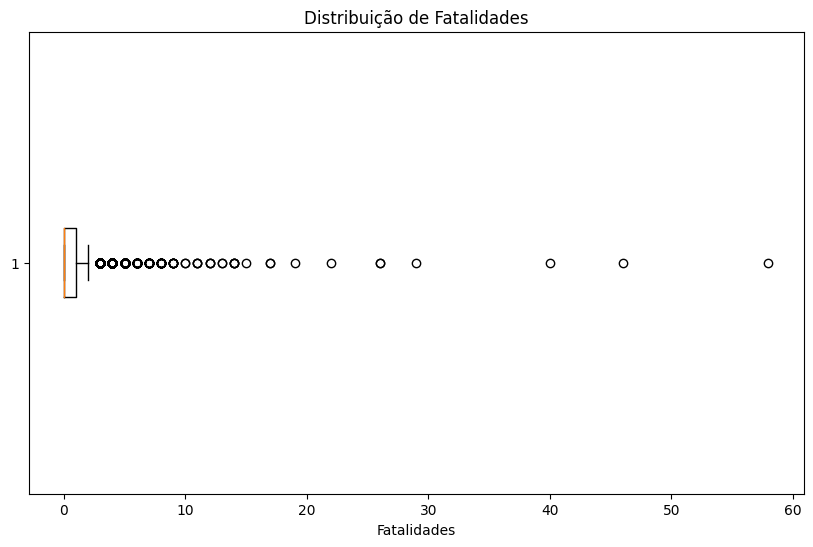

In [ ]:
# GRÁFICO PARA ANALISAR OUTLIERS
plt.figure(figsize=(10,6))
plt.boxplot(df['fatalidades'], vert=False)
plt.title('Distribuição de Fatalidades')
plt.xlabel('Fatalidades')
plt.show()

Interpretação da Assimetria:
Assimetria = 0: A distribuição dos dados é perfeitamente simétrica, como uma distribuição normal.

Assimetria > 0 (Positiva): A cauda da distribuição à direita da média é mais longa ou mais grossa que à esquerda. Isso indica que há mais valores acima da média.

Assimetria < 0 (Negativa): A cauda da distribuição à esquerda da média é mais longa ou mais grossa que à direita. Isso indica que há mais valores abaixo da média.

In [ ]:
import seaborn as sns
from scipy.stats import skew
import numpy as np

assimetria_cidade_ocorrencias = skew(df['fatalidades'])
print(f'A assimentria das fatalidades é : {assimetria_cidade_ocorrencias}')

A assimentria das fatalidades é : 12.69786219815022


Distribuição com cauda muito longa à direita.

Muitos valores concentrados no lado esquerdo da distribuição (próximos a
0) e alguns valores extremamente altos que estão puxando a média  (0.46) para a direita. Esses valores extremos são muito maiores do que a maioria dos outros valores no conjunto de dados.

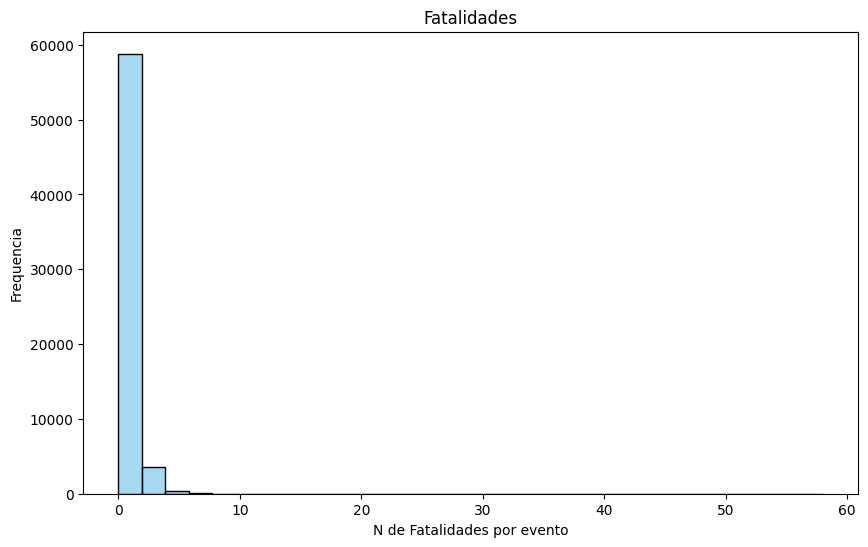

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fatalidades'], bins=30, kde=False, color='skyblue')
plt.title('Fatalidades')
plt.xlabel('N de Fatalidades por evento')
plt.ylabel('Frequencia')
plt.show()

In [ ]:
df_manaus = df[df['cidade'] == 'Manaus']
prob_fatalidades_manaus = df_manaus['fatalidades'].sum() / len(df_manaus)
print(f"A probabilidade de um evento em Manaus ter fatalidades é: {prob_fatalidades_manaus*100:.2f}%")

A probabilidade de um evento em Manaus ter fatalidades é: 77.77%


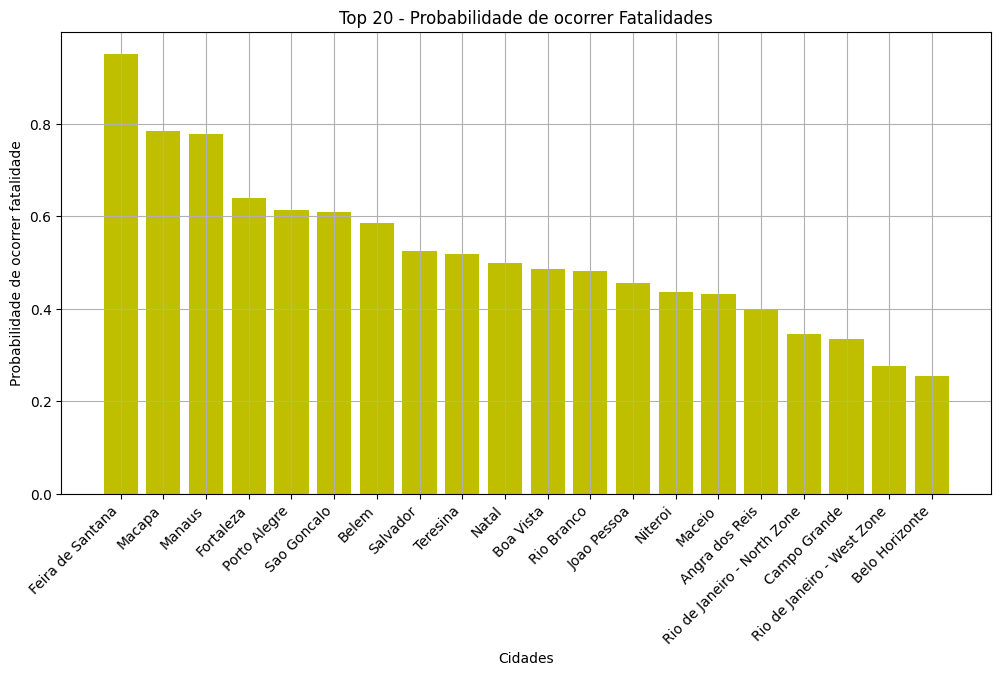

In [ ]:
# LISTA TOP 20 CIDADES COM MAIOR NÚMERO DE FATALIDADES
top_20_cidades_fatalidades =  ["Manaus", "Rio de Janeiro - North Zone", "Salvador", "Sao Goncalo", "Feira de Santana", "Macapa", "Belem", "Fortaleza", "Rio de Janeiro - West Zone", "Maceio", "Porto Alegre", "Teresina", "Joao Pessoa", "Boa Vista", "Niteroi", "Rio Branco", "Natal", "Belo Horizonte", "Angra dos Reis", "Campo Grande"]

cidades_probabilidades = {}

for i in top_20_cidades_fatalidades:
  df_proba = df[df['cidade']== i]
  prob_fatalidades = df_proba['fatalidades'].sum() / len(df_proba) # SOMA DO NÚMERO DE OCORRÊNCIAS DO TOP 20 CIDADES
  cidades_probabilidades[i] = prob_fatalidades





df_probabilidades = pd.Series(cidades_probabilidades)
df_probabilidades.columns = ['Cidade', 'Probabilidade']
df_probabilidades = df_probabilidades.sort_values(ascending=False)


plt.figure(figsize=(12,6))
plt.bar(df_probabilidades.index, df_probabilidades, color='y')
plt.title("Top 20 - Probabilidade de ocorrer Fatalidades")
plt.xlabel("Cidades")
plt.ylabel("Probabilidade de ocorrer fatalidade")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

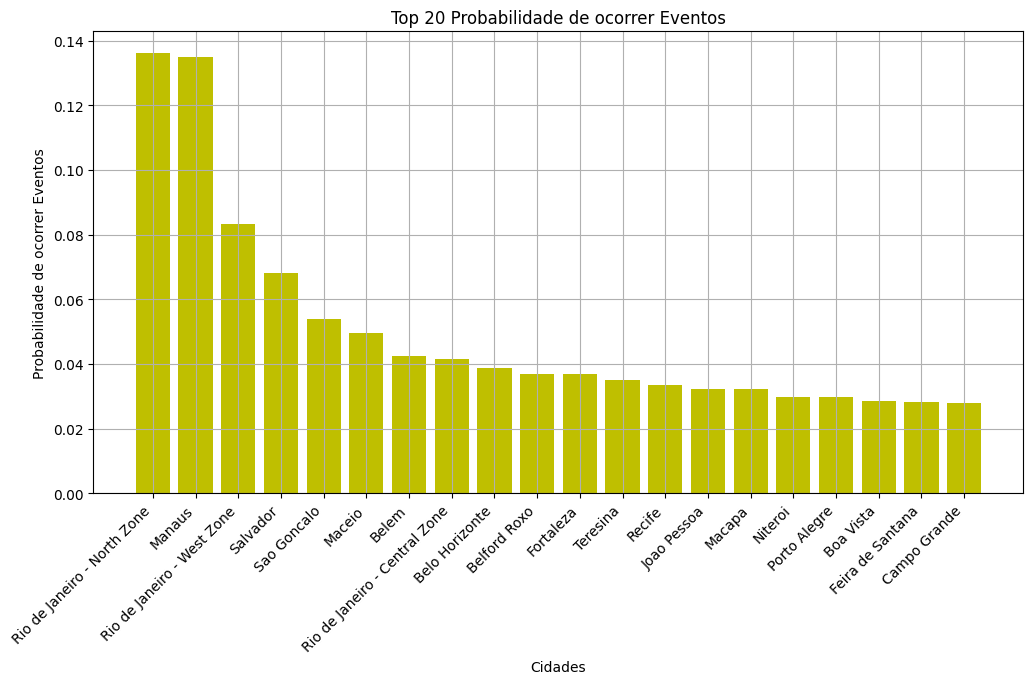

In [ ]:
top_20_cidades_ocorrencias =  ["Rio de Janeiro - North Zone", "Manaus", "Rio de Janeiro - West Zone", "Salvador", "Sao Goncalo", "Maceio", "Belem", "Rio de Janeiro - Central Zone", "Belo Horizonte", "Belford Roxo", "Fortaleza", "Teresina", "Recife", "Joao Pessoa", "Macapa", "Niteroi", "Porto Alegre", "Boa Vista", "Feira de Santana", "Campo Grande"]
cidades_ocorrencias_probabilidades = {}
eventos_top_20 = 0

for cont in top_20_cidades_ocorrencias:
  df_cont = df[df['cidade'] == cont ]
  eventos_top_20 += df_cont.count()

eventos_top_20 = eventos_top_20['cidade']

for i in top_20_cidades_ocorrencias:
  df_cidades_ocorrencias = df[df['cidade']== i]
  prob_ocorrencias = len(df_cidades_ocorrencias) / eventos_top_20
  cidades_ocorrencias_probabilidades[i] = prob_ocorrencias

df_probabilidades_ocorrencias = pd.Series(cidades_ocorrencias_probabilidades)
df_probabilidades_ocorrencias.columns = ['Cidade', 'Probabilidade Eventos']
df_probabilidades_ocorrencias = df_probabilidades_ocorrencias.sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(df_probabilidades_ocorrencias.index,df_probabilidades_ocorrencias, color='y')
plt.title("Top 20 Probabilidade de ocorrer Eventos")
plt.xlabel("Cidades")
plt.ylabel("Probabilidade de ocorrer Eventos")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()



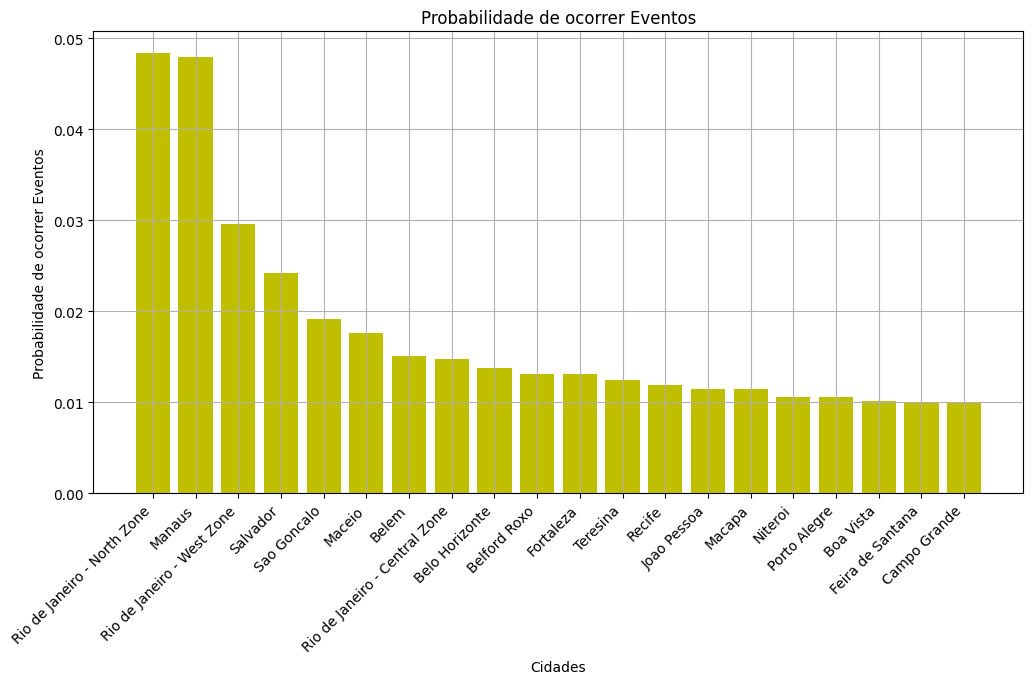

In [ ]:
# PROBABILIDADE DE OCORRER EVENTOS NESTAS CIDADES CONSIDERANDO TODO O DATAFRAME
cidades_ocorrencias_probabilidades_total = {}

for i in df['cidade']:
  df_cidades_ocorrencias_total = df[df['cidade']== i]
  prob_ocorrencias_total = len(df_cidades_ocorrencias_total) / len(df) # CONSIDERA TODOS OS EVENTOS REGISTRADOS NO DATAFRAME
  cidades_ocorrencias_probabilidades_total[i] = prob_ocorrencias_total

df_probabilidades_ocorrencias_total = pd.Series(cidades_ocorrencias_probabilidades_total)
df_probabilidades_ocorrencias_total.columns = ['Cidade', 'Probabilidade Eventos']
df_probabilidades_ocorrencias_total = df_probabilidades_ocorrencias_total.sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
plt.bar(df_probabilidades_ocorrencias_total.index,df_probabilidades_ocorrencias_total, color='y')
plt.title("Probabilidade de ocorrer Eventos")
plt.xlabel("Cidades")
plt.ylabel("Probabilidade de ocorrer Eventos")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


In [ ]:
# ANÁLISE DE NUMERO DE FATALIDADES POR DATA
data_fatalidades = df.groupby('data_evento')['fatalidades'].sum()
data_fatalidades = data_fatalidades.sort_values(ascending=False).head(20)
data_fatalidades

data_evento
2019-07-29    69
2018-05-02    67
2019-05-27    57
2018-03-24    48
2022-05-24    47
2018-04-10    44
2018-01-29    41
2018-02-18    40
2021-10-31    39
2018-01-27    39
2018-08-20    38
2018-07-03    38
2018-04-01    37
2018-04-09    37
2022-11-25    37
2019-01-11    37
2018-05-18    36
2021-12-08    36
2022-06-23    36
2019-10-30    35
Name: fatalidades, dtype: int64

In [ ]:
# ANÁLISE DO DIA 29-07-2019
data_29_07 = df['data_evento'] == '2019-07-29'
data_linha = df.loc[data_29_07]
data_linha.head(5)

,data_evento,tipo_ocorrencia,subtipo_ocorrencia,princ_envolvidos,envolvidos_sec,cidade,LATITUDE,LONGITUDE,alcance,resumo,fatalidades
23437,2019-07-29,Batalhas,Confronto armado,CCA: Class A Command,CV: Comando Vermelho,Altamira,-3.203,-52.206,Outro-Nacional,"On 29 July 2019, in Altamira, Para, 58 prisone...",58
23438,2019-07-29,Batalhas,Confronto armado,Grupo Armado Não Identificado (Brasil),Grupo Armado Não Identificado (Brasil),Sorocaba,-23.502,-47.458,Nacional,"On 29 July 2019, in Sorocaba, Sao Paulo, a sho...",1
23439,2019-07-29,Batalhas,Confronto armado,Grupo Armado Não Identificado (Brasil),Grupo Armado Não Identificado (Brasil),Belford Roxo,-22.764,-43.399,Mídia Nova,"On 29 July 2019, in Belford Roxo, Rio de Janei...",0
23440,2019-07-29,Batalhas,Confronto armado,Grupo Armado Não Identificado (Brasil),Grupo Armado Não Identificado (Brasil),Cabo Frio,-22.887,-42.026,Mídia Nova,"On 29 July 2019, in Cabo Frio, Rio de Janeiro,...",0
23441,2019-07-29,Batalhas,Confronto armado,Grupo Armado Não Identificado (Brasil),Grupo Armado Não Identificado (Brasil),Rio de Janeiro - North Zone,-22.857,-43.301,Mídia Nova,"On 29 July 2019, in Rio de Janeiro, Rio de Jan...",0


In [ ]:
#ANÁLISE DO DIA 02-05-2018
data_02_05 = df['data_evento'] == '2018-05-02'
data_linha = df.loc[data_02_05]
data_linha = data_linha.sort_values(by='fatalidades', ascending=False)
data_linha.head(5)

,data_evento,tipo_ocorrencia,subtipo_ocorrencia,princ_envolvidos,envolvidos_sec,cidade,LATITUDE,LONGITUDE,alcance,resumo,fatalidades
5389,2018-05-02,Violência contra civis,Ataque,Gangue Não Identificada e/ou Milícia Policial,Civis (Brasil),Belem,-1.444,-48.473,Nacional,"Around 2 May 2018 (week of), in Belem, Para, a...",46
5370,2018-05-02,Violência contra civis,Ataque,Gangue Não Identificada e/ou Milícia Policial,Civis (Brasil),Ananindeua,-1.366,-48.372,Nacional,"On 2 May 2018, in Ananindeua, Para, four teena...",5
5393,2018-05-02,Batalhas,Confronto armado,PCC: Primeiro Comando da Capital,PGC: Primeiro Grupo Catarinense,Florianopolis,-27.597,-48.549,Nacional,"Around 2 May 2018 (as reported), in Florianopo...",2
5392,2018-05-02,Batalhas,Confronto armado,Gangue Não Identificada e/ou Milícia Policial,Gangue Não Identificada (Brasil),Fortaleza,-3.717,-38.543,Subnacional,"On 2 May 2018, in Fortaleza, Ceara, two men we...",2
5390,2018-05-02,Violência contra civis,Ataque,Gangue Não Identificada e/ou Milícia Policial,Civis (Brasil),Belem,-1.444,-48.473,Nacional,"On 2 May 2018, in Belem, Para, an off-duty mil...",2


In [ ]:
#ANÁLISE DO DIA 02-05-2018 PARA RETIRAR O RESUMO
id_5389 = df['fatalidades'] == 46
evento_5389 = df.loc[id_5389]
resumo = evento_5389['resumo']

resumo_str = str(resumo)
print(resumo_str)


5389    Around 2 May 2018 (week of), in Belem, Para, a...
Name: resumo, dtype: string


02 de maio de 2018,Violência contra civis,Ataque,Gangue não identificada e/ou milícia policial,Civis (Brasil),Brasil,Belém,-1.444,-48.473,Nacional,"Por volta de 2 de maio de 2018 (semana de), em Belém, No Pará, um total de 46 pessoas foram mortas. Segundo a Secretaria de Estado de Segurança Pública e Defesa Social do Pará, essas execuções estavam associadas ao assassinato de um cabo da Polícia Militar em 29 de abril de 2018. 46 mortes.",46

Desde domingo a região metropolitana de Belém do Pará teve cerca de 30 mortes
Esses assassinatos são possivelmente uma retaliação a morte de uma PM

<img src="https://cdn.brasildefato.com.br/media/efd7a47ad12ff7dcaf98d01d944e468c.jpg" alt="Retaliação Assassinato PM" width="700"/>

FONTE: https://brasildefatorj.com.br/2018/05/03/desde-domingo-a-regiao-metropolitana-de-belem-do-para-teve-cerca-de-30-mortes

In [ ]:
#ANÁLISE DO DIA 27-05-2019

data_27_05 = df['data_evento'] == '2019-05-27'
data_linha = df.loc[data_27_05]
data_linha = data_linha.sort_values(by='fatalidades', ascending=False)
data_linha.head(5)

,data_evento,tipo_ocorrencia,subtipo_ocorrencia,princ_envolvidos,envolvidos_sec,cidade,LATITUDE,LONGITUDE,alcance,resumo,fatalidades
21207,2019-05-27,Batalhas,Confronto armado,Pure FDN: Pure Family of the North,FDN: Family of the North,Manaus,-3.102,-60.025,Outro-Nacional,"On 27 May 2019, in Amazonas, following the pri...",40
21228,2019-05-27,Batalhas,Confronto armado,Gangue Não Identificada (Brasil),Military Forces of Brazil (2019-2022) Military...,Jaguaripe,-13.116,-38.894,Nacional,"On 27 May 2019, in Jaguaripe, Bahia, an armed ...",4
21232,2019-05-27,Batalhas,Confronto armado,Gangue Não Identificada e/ou Milícia Policial,Military Forces of Brazil (2019-2022) Military...,Rio de Janeiro - Central Zone,-22.906,-43.182,Subnacional,"On 27 May 2019, in Rio de Janeiro, Rio de Jane...",4
21233,2019-05-27,Violência contra civis,Ataque,Gangue Não Identificada e/ou Milícia Policial,Civis (Brasil),Salvador,-12.971,-38.511,Nacional,"On 27 May 2019, in Salvador, Bahia, a military...",1
21220,2019-05-27,Batalhas,Confronto armado,Gangue Não Identificada e/ou Milícia Policial,Gangue Não Identificada (Brasil),Manaus,-3.102,-60.025,Subnacional,"On 27 May 2019, in Manaus, Amazonas, an armed ...",1


In [ ]:
id_21207 = df['fatalidades'] == 40
evento_21207 = df.loc[id_21207]
resumo = evento_21207['resumo']

21207    On 27 May 2019, in Amazonas, following the pri...
Name: resumo, dtype: string


"Em 27 de maio de 2019, no Amazonas, após a briga prisional de 26 de maio de 2019 no Complexo Penitenciário Anísio Jobim (Compaj) que resultou em 15 mortes, novos combates ocorreram na Instituição Penal Antonio Trindade (Ipat), no Centro de Detenção Provisória Masculina (CDPM 1), no Complexo Penitenciário Anísio Jobim (Compaj) e a Unidade Prisional

40 presos são achados mortos dentro de cadeias do Amazonas
Segundo o governo do estado, corpos foram encontrados nesta segunda e indícios apontam mortes por asfixia. No domingo, briga havia deixado 15 mortos no Compaj.

<img src="https://s2-g1.glbimg.com/JhsDfRtH_cIk_SsPJgv1drrzU6Y=/0x0:1600x2870/1000x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2019/u/B/9GGDKpRZWMzEgtEM0dvw/am-briga-detentos-v7.jpg" alt="Retaliação Assassinato PM" width="300"/>

FONTE: https://g1.globo.com/am/amazonas/noticia/2019/05/27/mais-presos-sao-achados-mortos-dentro-de-cadeias-em-manaus-15-morreram-neste-domingo.ghtml



STF volta a julgar ação sobre presídios nesta quarta; já há maioria favorável a plano para o sistema carcerário
Ministros analisam ação do Psol e concluem que há 'estado de coisas inconstitucional' no sistema prisional do Brasil, com violação sistemática e massiva de direitos humanos dos presos. Julgamento será concluído com o voto do ministro Gilmar Mendes.

<img src="https://s2.glbimg.com/JaK6MAb55RGbOvJZ_cX1oxE1-vg=/620x465/s.glbimg.com/jo/g1/f/original/2016/09/27/itamar_miranda_.jpg" alt="Retaliação Assassinato PM" width="700"/>


FONTE: https://g1.globo.com/politica/noticia/2023/10/04/stf-volta-a-julgar-acao-sobre-presidios-nesta-quarta-ja-ha-maioria-favoravel-a-plano-para-o-sistema-carcerario.ghtml

USO DE FORÇA DA POLÍCIA NO BRASIL

<img src="https://guiadoestudante.abril.com.br/wp-content/uploads/sites/4/2023/09/GettyImages-1622205434.jpg?quality=100&strip=info&w=1280&h=720&crop=1" alt="Retaliação Assassinato PM" width="700"/>

RESULTADO GOOGLE NOTÍCIAS SOBRE USO DA FORÇA EXAGERADO DA POLÍCIA
https://www.google.com/search?sca_esv=570824042&sxsrf=AM9HkKnG51THVbbvoa6gY3OnWiHSGEt2fw:1696462542175&q=preparo+da+policia+contra+for%C3%A7a+violenta&tbm=nws&source=lnms&sa=X&ved=2ahUKEwikv825x92BAxUfpZUCHbg5AHAQ0pQJegQIChAB&biw=2560&bih=923&dpr=1


<img src="https://static.poder360.com.br/2023/10/mortes-bahia-drive-2-out-2023-3.png" width="700"/>

FONTE: https://www.poder360.com.br/seguranca-publica/mortes-por-intervencoes-policias-na-ba-cresceram-365-em-13-anos/


In [ ]:
media_fatalidades_dia =  df['fatalidades'].sum() /  1845
print(f'Media Fatalidades por dia {media_fatalidades_dia}')

Media Fatalidades por dia 15.575067750677507


In [ ]:
media_ocorrencias_dia =  len(df['tipo_ocorrencia']) /  1845
print(f'Media Ocorrências por dia {media_ocorrencias_dia}')

Media Ocorrências por dia 34.0710027100271


In [ ]:
# PROBABILIDADE DE OCORRER FATALIDADES EM CONFRONTOS ARMADOS
confronto_armado = df[df['subtipo_ocorrencia'] == 'Confronto armado']

eventos_relevantes = len(confronto_armado[confronto_armado['fatalidades'] > 1])

total_confronto_armado = len(confronto_armado)
probabilidade = eventos_relevantes / total_confronto_armado

print(f"A probabilidade de um evento 'confronto armado' ter fatalidades > 1 é: {probabilidade:.2%}")

A probabilidade de um evento 'confronto armado' ter fatalidades > 1 é: 11.78%


In [ ]:
# PROBABILIDADE DE OCORRER FATALIDADES EM VIOLÊNCIA SEXUAL

violencia_sexual = df[df['subtipo_ocorrencia'] == 'Violência sexual']

violencia_sexual_2 = len(violencia_sexual[violencia_sexual['fatalidades'] > 1])

total_violencia_sexual = len(violencia_sexual)
probabilidade_violencia_ = violencia_sexual_2  / total_violencia_sexual

print(f"A probabilidade de um evento 'Violência sexual' ter fatalidades > 1 é: {probabilidade:.2%}")

A probabilidade de um evento 'Violência sexual' ter fatalidades > 1 é: 11.78%


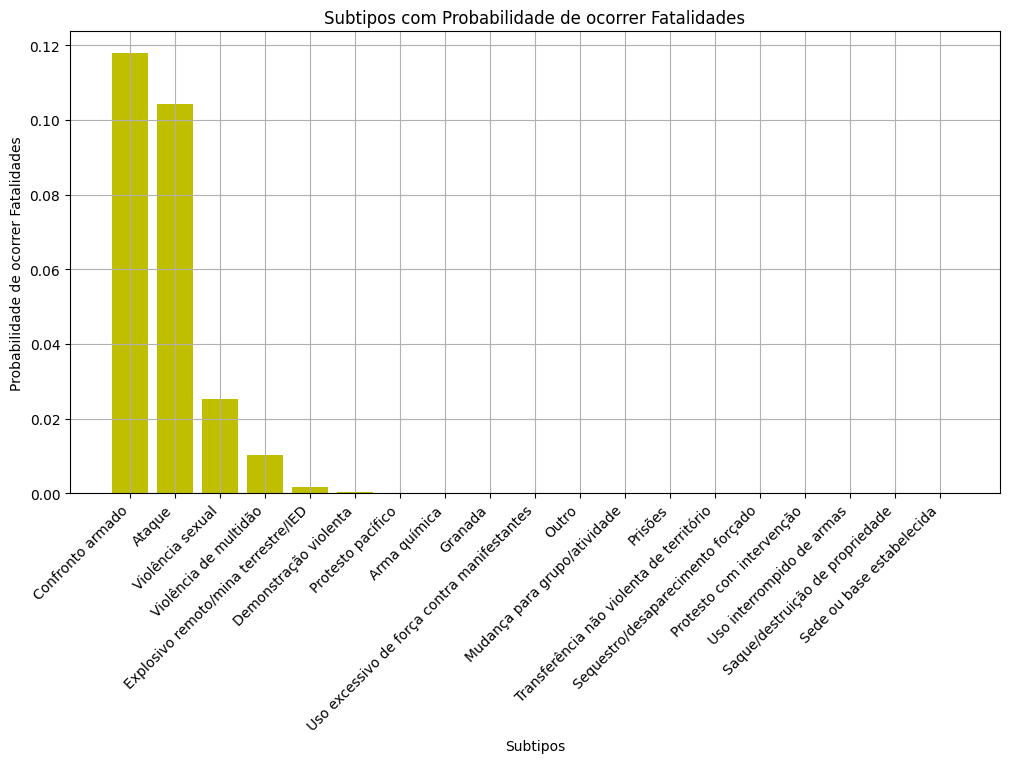

In [ ]:
# CRIAR UM DATAFRAME COM TODOS OS TIPOS DE SUBTIPOS E CALCUAR A PROBABILIDADE DE OCORRER FATALIDADES
lista_subtipos = df['subtipo_ocorrencia'].unique()
subtipos_fatalidade = {}
for i in lista_subtipos:
  subtipo_ocorrencias = df[df['subtipo_ocorrencia'] == i ]
  subtipo_com_fatalidade = (len(subtipo_ocorrencias[subtipo_ocorrencias ['fatalidades'] > 1])) / len(subtipo_ocorrencias)
  subtipos_fatalidade[i] = subtipo_com_fatalidade

subtipos_fatalidade = pd.Series(subtipos_fatalidade)
subtipos_fatalidade.columns = ['Subtipo', 'Probabilidade de Fatalidade']
subtipos_fatalidade = subtipos_fatalidade.sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(subtipos_fatalidade.index,subtipos_fatalidade, color='y')
plt.title("Subtipos com Probabilidade de ocorrer Fatalidades")
plt.xlabel("Subtipos")
plt.ylabel("Probabilidade de ocorrer Fatalidades")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


In [ ]:
subtipos_fatalidade

Confronto armado                               0.117840
Ataque                                         0.104427
Violência sexual                               0.025316
Violência de multidão                          0.010294
Explosivo remoto/mina terrestre/IED            0.001773
Demonstração violenta                          0.000473
Protesto pacífico                              0.000000
Arma química                                   0.000000
Granada                                        0.000000
Uso excessivo de força contra manifestantes    0.000000
Outro                                          0.000000
Mudança para grupo/atividade                   0.000000
Prisões                                        0.000000
Transferência não violenta de território       0.000000
Sequestro/desaparecimento forçado              0.000000
Protesto com intervenção                       0.000000
Uso interrompido de armas                      0.000000
Saque/destruição de propriedade                0

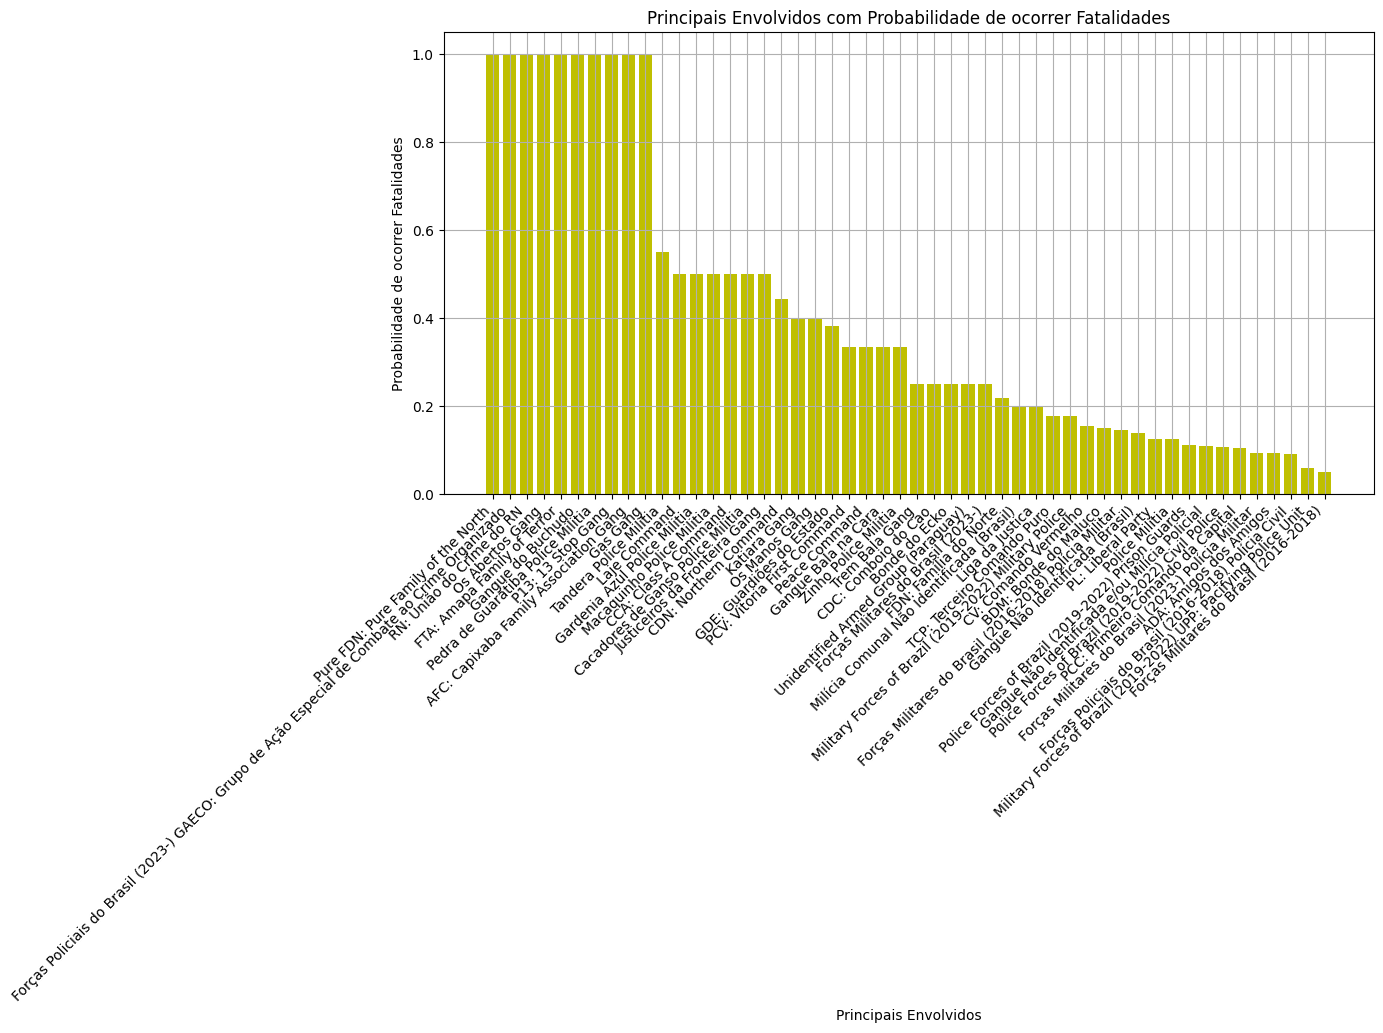

In [ ]:
lista_princ_envolvidos = df['princ_envolvidos'].unique()
dict_princ_envolvido = {}

for i in lista_princ_envolvidos:
  princ_envolvidos = df[df['princ_envolvidos'] == i ]
  prob_princ_envolvidos_com_fatalidade = (len(princ_envolvidos[princ_envolvidos ['fatalidades'] > 1])) / len(princ_envolvidos)
  dict_princ_envolvido[i] = prob_princ_envolvidos_com_fatalidade

dict_princ_envolvido = pd.Series(dict_princ_envolvido)
dict_princ_envolvido.columns = ['Principais Envolvidos', 'Probabilidade de Fatalidade']
dict_princ_envolvido = dict_princ_envolvido.sort_values(ascending=False).head(50)

plt.figure(figsize=(12,6))
plt.bar(dict_princ_envolvido.index,dict_princ_envolvido, color='y')
plt.title("Principais Envolvidos com Probabilidade de ocorrer Fatalidades")
plt.xlabel("Principais Envolvidos")
plt.ylabel("Probabilidade de ocorrer Fatalidades")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


In [ ]:
dict_princ_envolvido

Pure FDN: Pure Family of the North                                                                 1.000000
Forças Policiais do Brasil (2023-) GAECO: Grupo de Ação Especial de Combate ao Crime Organizado    1.000000
RN: União do Crime do RN                                                                           1.000000
Os Abertos Gang                                                                                    1.000000
FTA: Amapa Family of Terror                                                                        1.000000
Gangue do Buchudo                                                                                  1.000000
Pedra de Guaratiba Police Militia                                                                  1.000000
P13: 13 Stop Gang                                                                                  1.000000
AFC: Capixaba Family Association Gang                                                              1.000000
Gas Gang                    

O atual cenário da extinta FDN
A facção FDN atualmente é considerada extinta no estado do Amazonas. Esse fato se deve à rixas da facção com a sua antiga aliada Comando Vermelho.[9] Em 2019, a FDN e o CV romperam suas conexões criminosas após um racha interno na FDN. Zé Roberto, João Branco e Gelson Carnaúba, considerados os fundadores da FDN, entraram em conflito, o que gerou mortes nas ruas da capital amazonense. [10] Criminosos então ligados a Gelson Carnaúba, ingressam no Comando Vermelho após o Mano G, como também é conhecido, mudar de lado na guerra. Criminosos ligados a Zé Roberto continuaram na FDN. Com a FDN enfraquecida após a expansão do CV, criminosos comandados pelo filho de Zé Roberto criam a facção Cartel do Norte, o CDN. [11] O CDN tinha uma aliança com outra facção amazonense, os Revolucionários do Amazonas (RDA).

O RDA era uma dissidência criada a partir de membros que eram do CV e saíram da facção carioca. O CDN manteve-se ativo até 2022, onde criminosos do Comando Vermelho mataram seu principal líder, o L7, filho do Zé Roberto da Compensa. [12]

Atualmente há informações que apontam uma aliança entre o RDA e o PCC contra o avanço do Comando Vermelho no Amazonas.

FONTE : https://pt.wikipedia.org/wiki/Fam%C3%ADlia_do_Norte#:~:text=A%20Fam%C3%ADlia%20do%20Norte%20(FDN,PCC%20e%20CV%20em%202016.

In [ ]:
# VERIFICAR OS PERIODOS DE ATUAÇÃO DA FDN
extinda_fdn = df[df['princ_envolvidos'] == 'Pure FDN: Pure Family of the North']

min_data = extinda_fdn['data_evento'].min()
max_data = extinda_fdn['data_evento'].max()

print(f'Menor Data: {min_data}')
print(f'Maior Data: {max_data}')

Menor Data: 2019-05-26 00:00:00
Maior Data: 2019-05-27 00:00:00


In [ ]:
cv_fatalidade = df[df['princ_envolvidos'] == 'CV: Comando Vermelho']

# Contar eventos com fatalidades > 1 dentro dos eventos confronto armado
cv_fatalidade_prob = len(cv_fatalidade[cv_fatalidade['fatalidades'] > 1]) / len(cv_fatalidade)

print(f"A probabilidade de um evento 'CV: Comando Vermelho' ter fatalidades > 1 é: {cv_fatalidade_prob:.2%}")

A probabilidade de um evento 'CV: Comando Vermelho' ter fatalidades > 1 é: 15.47%


In [ ]:
pcc_fatalidade = df[df['princ_envolvidos'] == 'PCC: Primeiro Comando da Capital']

# Contar eventos com fatalidades > 1 dentro dos eventos confronto armado
pcc_fatalidade_prob = len(pcc_fatalidade[pcc_fatalidade['fatalidades'] > 1]) / len(pcc_fatalidade)

print(f"A probabilidade de um evento 'PCC: Primeiro Comando da Capital' ter fatalidades > 1 é: {pcc_fatalidade_prob:.2%}")

A probabilidade de um evento 'PCC: Primeiro Comando da Capital' ter fatalidades > 1 é: 10.53%


In [ ]:
pip install folium

In [ ]:
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [ ]:
# QUANTIDADE DE EVENTOS OCORRIDOS MAPA DE CALOR
mapa_base = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

df_eventos = df.groupby(['LATITUDE', 'LONGITUDE']).size().reset_index(name='count')
eventos_heat_data = [[row['LATITUDE'], row['LONGITUDE'], row['count']] for index, row in df_eventos.iterrows()]
HeatMap(eventos_heat_data, radius=15).add_to(mapa_base)
mapa_base

In [ ]:
# MAPA DE CALOR CONSIDERANDO NUMERO DE FATALIDADES
mapa_base = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)
df_fatalidades = df.groupby(['LATITUDE', 'LONGITUDE'])['fatalidades'].sum().reset_index()
fatalidades_heat_data = [[row['LATITUDE'], row['LONGITUDE'], row['fatalidades']] for index, row in df_fatalidades.iterrows()]
HeatMap(eventos_heat_data, radius=15).add_to(mapa_base)
mapa_base


In [ ]:
#ANÁLISE DO DIA 08-01-2023

data_08_01 = df['data_evento'] == '2023-01-08'
data_linha = df.loc[data_08_01]
data_linha = data_linha.sort_values(by='fatalidades', ascending=False)
data_linha

,data_evento,tipo_ocorrencia,subtipo_ocorrencia,princ_envolvidos,envolvidos_sec,cidade,LATITUDE,LONGITUDE,alcance,resumo,fatalidades
62455,2023-01-08,Batalhas,Confronto armado,PCV: Vitoria First Command,AFC: Capixaba Family Association Gang,Cariacica,-20.264,-40.420,Subnacional-Nacional,"On 8 January 2023, in Cariacica (Espirito Sant...",2
62461,2023-01-08,Violência contra civis,Ataque,Grupo Armado Não Identificado (Brasil),Civis (Brasil),Sinop,-11.864,-55.502,Nacional,"On 8 January 2023, in Sinop (Mato Grosso), a m...",1
62466,2023-01-08,Violência contra civis,Ataque,Grupo Armado Não Identificado (Brasil),Civis (Brasil),Taubate,-23.026,-45.555,Nacional,"On 8 January 2023, in Taubate (Sao Paulo), fou...",1
62465,2023-01-08,Violência contra civis,Ataque,Gangue Não Identificada e/ou Milícia Policial,Civis (Brasil),Ribeirao Preto,-21.177,-47.810,Subnacional-Nacional,"On 8 January 2023, in Ribeirao Preto (Sao Paul...",1
62464,2023-01-08,Violência contra civis,Ataque,Gangue Não Identificada (Brasil),Civis (Brasil),Uniao,-4.585,-42.858,Nacional,"On 8 January 2023, in Uniao (Piaui), a man was...",1
62462,2023-01-08,Violência contra civis,Ataque,Grupo Armado Não Identificado (Brasil),Civis (Brasil),Ponta Pora,-22.536,-55.726,Subnacional,"On 8 January 2023, in Ponta Pora (Mato Grosso ...",1
62463,2023-01-08,Violência contra civis,Ataque,Gangue Não Identificada (Brasil),Civis (Brasil),Uniao,-4.585,-42.858,Subnacional-Nacional,"On 8 January 2023, in Uniao (Piaui), a woman w...",1
62460,2023-01-08,Violência contra civis,Ataque,CV: Comando Vermelho,Civis (Brasil),Manaus,-3.102,-60.025,Subnacional,"Around 8 January 2023 (as reported), in Manaus...",1
62473,2023-01-08,Protestos,Protesto pacífico,Manifestantes (Brasil),<NA>,Lages,-27.816,-50.326,Subnacional,"On 8 January 2023, in Lages (Santa Catarina), ...",0
62479,2023-01-08,Distúrbios,Demonstração violenta,Tumultuadores (Brasil),Civis (Brasil),Sinop,-11.864,-55.502,Nacional,"On 8 January 2023, in Sinop (Mato Grosso), Bol...",0


In [ ]:
#ANÁLISE DO DIA 08-01-2023  Brasília

data_08_01_brasilia = df[(df['data_evento'] == '2023-01-08') & (df['cidade'] == 'Brasilia')]
data_08_01_brasilia

,data_evento,tipo_ocorrencia,subtipo_ocorrencia,princ_envolvidos,envolvidos_sec,cidade,LATITUDE,LONGITUDE,alcance,resumo,fatalidades
62482,2023-01-08,Distúrbios,Demonstração violenta,Tumultuadores (Brasil),Military Forces of Brazil (2023-) Military Police,Brasilia,-15.78,-47.93,Subnacional-Nacional,"On 8 January 2023, in Brasilia (Distrito Feder...",0


In [ ]:
resumo_Brasilia = data_08_01_brasilia['resumo']

<img src="https://www12.senado.leg.br/noticias/materias/2023/01/08/senadores-pedem-providencias-e-repudiam-violencia-e-vandalismo-em-brasilia/whatsapp-image-2023-01-08-at-16-51-15.jpeg/mural/imagem_materia
" alt="Quebradeira Brasília" width="700"/>

///

08 de janeiro de 2023,Motins,Manifestação violenta,Desordeiros (Brasil),Forças Militares do Brasil (2023-) Polícia Militar,Brasil,Brasília,-15.78,-47.93,Subnacional-Nacional,"Em 8 de janeiro de 2023, em Brasília ( Distrito Federal), milhares de apoiadores de Bolsonaro (PL) invadiram prédios do Legislativo, do Executivo e do Judiciário, vandalizaram suas estruturas, destruíram e roubaram objetos históricos e artísticos, além de roubarem armas de fogo do gabinete de segurança.

In [ ]:
pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title='Brazil Conflict Tracker', explorative=True)

profile.to_file("brazil_conflict_tracker.html")

<ipython-input-75-0b8f6bdfd160>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]